1.Perform Fisher Discriminant Analysis on pima-indians-diabetes.csv \
2. Perform Decision Tree classification on pima-indians-diabetes.csv \
3. Perform Fisher Discriminant Analysis on pima-indians-diabetes.csv and then perform decision tree classification. compare the results.

colums in csv file is in this order : \
Fields description follow: \
A. preg = Number of times pregnant \
B. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test \
C. pres = Diastolic blood pressure (mm Hg) \
D. skin = Triceps skin fold thickness (mm) \
E. test = 2-Hour serum insulin (mu U/ml) \
F. mass = Body mass index (weight in kg/(height in m)^2) \
g. pedi = Diabetes pedigree function \
H. age = Age (years) \
I. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [70]:
# This assignment is done by CS20B1044 Avinash R Changrani
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('pima-indians-diabetes.csv')

df.columns = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]

df.head()

# df.groupby('class').size()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [72]:
# Split the data into training and testing data

from sklearn.model_selection import train_test_split

# Features
X = df.drop('class', axis=1)

# Target variable
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# (1) Perform Fischer's Discriminant Analysis on pima-indians-diabetes dataset 

X_mean = X_train.groupby(y_train).mean()

X_mean

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,3.335244,110.025788,67.908309,18.916905,65.318052,30.298567,0.423238,31.627507
1,4.978610,140.288770,74.347594,22.572193,105.128342,34.979679,0.555449,37.481283


In [74]:
# Computing mean vector for each class
positives = df.loc[X_train.groupby(y_train).groups[0]]
negatives = df.loc[X_train.groupby(y_train).groups[1]]

# print(positives)
# print(negatives)
# positive_mean = np.array(X_mean.iloc[1])
# negative_mean = np.array(X_mean.iloc[0])

positives = positives.drop('class', axis=1)
positives = np.array(positives)
negatives = negatives.drop('class', axis=1)
negatives = np.array(negatives)

positive_mean = np.mean(positives, axis=0)

negative_mean = np.mean(negatives, axis=0)


print(positive_mean)

print(negative_mean)

[  3.33524355 110.02578797  67.90830946  18.91690544  65.31805158
  30.29856734   0.42323782  31.62750716]
[  4.97860963 140.28877005  74.34759358  22.57219251 105.12834225
  34.97967914   0.5554492   37.48128342]


In [75]:
# Calculating scatter matrices for each class
count = X_train.groupby(y_train).size()

list(X_train.groupby(y_train).groups[0])

S1 = (count[0]-1)*np.cov(positives.T)

print(S1)

# print(S1.shape)

S2 = (count[1]-1)*np.cov(negatives.T)

print(S2)

[[ 3.33577650e+03  3.72098281e+03  3.55272779e+03 -3.14027794e+03
  -1.75322120e+04  3.16667622e+02 -2.24698252e+01  7.45458166e+03]
 [ 3.72098281e+03  2.38530768e+05  3.64358252e+04 -1.62625215e+03
   2.69164138e+05  7.09851289e+03  2.09821860e+02  2.93603524e+04]
 [ 3.55272779e+03  3.64358252e+04  1.08855066e+05  1.32263410e+04
   3.59261777e+04  1.92596542e+04 -2.41553897e+01  1.42060802e+04]
 [-3.14027794e+03 -1.62625215e+03  1.32263410e+04  8.26465903e+04
   2.23668223e+05  1.74678585e+04  1.13921897e+02 -1.57628023e+04]
 [-1.75322120e+04  2.69164138e+05  3.59261777e+04  2.23668223e+05
   3.10636770e+06  6.20633590e+04  1.32066260e+03 -8.18946533e+04]
 [ 3.16667622e+02  7.09851289e+03  1.92596542e+04  1.74678585e+04
   6.20633590e+04  2.24858293e+04  3.61023189e+01  2.93813754e+02]
 [-2.24698252e+01  2.09821860e+02 -2.41553897e+01  1.13921897e+02
   1.32066260e+03  3.61023189e+01  2.83286793e+01  5.75659169e+01]
 [ 7.45458166e+03  2.93603524e+04  1.42060802e+04 -1.57628023e+04
  -

In [76]:
# Total scatter matrix

S = S1 + S2
print(S)

[[ 5.89369094e+03  2.18213789e+03  4.50511817e+03 -4.02198917e+03
  -2.69736987e+04 -8.25113662e+02 -2.94590284e+01  1.05765068e+04]
 [ 2.18213789e+03  4.17853174e+05  4.83890552e+04 -1.88215054e+03
   4.87626207e+05  1.04139102e+04  2.65584603e+02  3.32333631e+04]
 [ 4.50511817e+03  4.83890552e+04  1.61221472e+05  2.14171485e+04
   3.20388354e+04  2.51876750e+04 -2.02845875e+01  2.41737968e+04]
 [-4.02198917e+03 -1.88215054e+03  2.14171485e+04  1.37696366e+05
   4.35752491e+05  2.79785328e+04  4.79645833e+02 -2.09422996e+04]
 [-2.69736987e+04  4.87626207e+05  3.20388354e+04  4.35752491e+05
   7.06129462e+06  8.05707467e+04  2.82160482e+03 -7.33062041e+04]
 [-8.25113662e+02  1.04139102e+04  2.51876750e+04  2.79785328e+04
   8.05707467e+04  3.37689321e+04  1.15938526e+02 -2.88895737e+03]
 [-2.94590284e+01  2.65584603e+02 -2.02845875e+01  4.79645833e+02
   2.82160482e+03  1.15938526e+02  5.63868035e+01  5.19348910e+00]
 [ 1.05765068e+04  3.32333631e+04  2.41737968e+04 -2.09422996e+04
  -

In [77]:
from numpy.linalg import inv
S_inv = inv(S)
print(S_inv)

[[ 2.32424870e-04  1.03675104e-06 -2.47844917e-06 -5.42772491e-08
   4.20136388e-07  3.14922601e-06  9.16176334e-05 -3.25745749e-05]
 [ 1.03675104e-06  2.88516681e-06 -6.90776252e-07  9.38105970e-07
  -2.53068231e-07 -6.03330401e-07 -7.25816508e-06 -1.23470466e-06]
 [-2.47844917e-06 -6.90776252e-07  7.75973834e-06 -8.86169681e-07
   8.78720360e-08 -5.36990527e-06  1.91405508e-05 -2.26017979e-06]
 [-5.42772491e-08  9.38105970e-07 -8.86169681e-07  1.14235958e-05
  -6.38751134e-07 -7.19080992e-06 -5.53942421e-05  2.21397465e-06]
 [ 4.20136388e-07 -2.53068231e-07  8.78720360e-08 -6.38751134e-07
   2.00523019e-07  8.90416117e-08 -3.34508226e-06  4.67948244e-08]
 [ 3.14922601e-06 -6.03330401e-07 -5.36990527e-06 -7.19080992e-06
   8.90416117e-08  3.98065525e-05 -2.26900378e-05  1.19178942e-06]
 [ 9.16176334e-05 -7.25816508e-06  1.91405508e-05 -5.53942421e-05
  -3.34508226e-06 -2.26900378e-05  1.85122831e-02 -3.75124244e-05]
 [-3.25745749e-05 -1.23470466e-06 -2.26017979e-06  2.21397465e-06
   

In [78]:
# Weight vector for projection
W = np.matmul(S_inv, (positive_mean - negative_mean))
print(W)

[-2.50072738e-04 -6.69121812e-05  1.05888972e-05 -1.08974202e-05
  5.05785296e-07 -1.19914217e-04 -1.84023895e-03 -2.40673213e-05]


In [79]:
positive_mean_proj = np.matmul(W.T, positive_mean)
negative_mean_proj = np.matmul(W.T, negative_mean)
zcut = 0.5*(positive_mean_proj + negative_mean_proj)
print(positive_mean_proj, negative_mean_proj,zcut)

-0.012823430472839565 -0.016156383582266055 -0.01448990702755281


In [80]:
prediction = []
accuracies = []

for i in range(len(X_test)):
    z = np.matmul(W.T, X_test.iloc[i])
    if z > zcut:
        prediction.append(0)
    else:
        prediction.append(1)

temp = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': prediction})
print("Predicted Labels vs Actual Labels: ")
temp

Predicted Labels vs Actual Labels: 


,Actual Labels,Predicted Labels
667,0,0
324,0,0
623,0,0
689,0,0
521,0,0
...,...,...
618,1,0
198,1,1
537,0,0
329,0,1


In [81]:
count = 0

for i in range(len(y_test)):
    if y_test.iloc[i] == prediction[i]:
        count += 1

accuracy = count / len(y_test)

accuracies.append(accuracy)

print("The Accuracy of Fischer's Discriminant Analysis is: ", accuracy*100, "%")

The Accuracy of Fischer's Discriminant Analysis is:  77.05627705627705 %


In [82]:
# (2) Perform Decision Tree classification on pima-indians-diabetes.csv

# split dataset into training and testing data with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Train the model using the training sets
clf.fit(X_train, y_train)

# predict the repsonse for the test dataset
prediction = clf.predict(X_test)

print("Predicted Labels vs Actual Labels: ")

temp


Predicted Labels vs Actual Labels: 


,Actual Labels,Predicted Labels
667,0,0
324,0,0
623,0,0
689,0,0
521,0,0
...,...,...
618,1,0
198,1,1
537,0,0
329,0,1


In [83]:
print("The Accuracy of Decision Tree is: ", accuracy_score(y_test, prediction)*100, "%")
accuracies.append(accuracy_score(y_test, prediction))

The Accuracy of Decision Tree is:  70.995670995671 %


In [84]:
# (3) Perform Fisher Discriminant Analysis on pima-indians-diabetes.csv and then perform decision tree classification. compare the results

# create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)

# Train the model using the training sets after projection
clf.fit(np.matmul(W.T,X_train.T).values.reshape(-1,1), y_train)

# predict the repsonse for the test dataset after projection
prediction = clf.predict(np.matmul(W.T,X_test.T).values.reshape(-1,1))

temp = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': prediction})

print("Predicted Labels vs Actual Labels: ")

temp

Predicted Labels vs Actual Labels: 


,Actual Labels,Predicted Labels
667,0,0
324,0,0
623,0,0
689,0,0
521,0,0
...,...,...
618,1,0
198,1,1
537,0,0
329,0,1


In [85]:
print("The Accuracy of Decision Tree after using Fischer's Linear Discriminant Function is: ", accuracy_score(y_test, prediction)*100, "%")
accuracies.append(accuracy_score(y_test, prediction))

The Accuracy of Decision Tree after using Fischer's Linear Discriminant Function is:  77.48917748917748 %


Accuracy of the Decision Tree Model after Projection is slighlty better [(2 ~ 4)%] than the Decision Tree Model before Projection. 

# Accuracy Comparison : 

### Decision Tree < Decision Tree after Projection < Fisher's Discriminant Analysis

<AxesSubplot:>

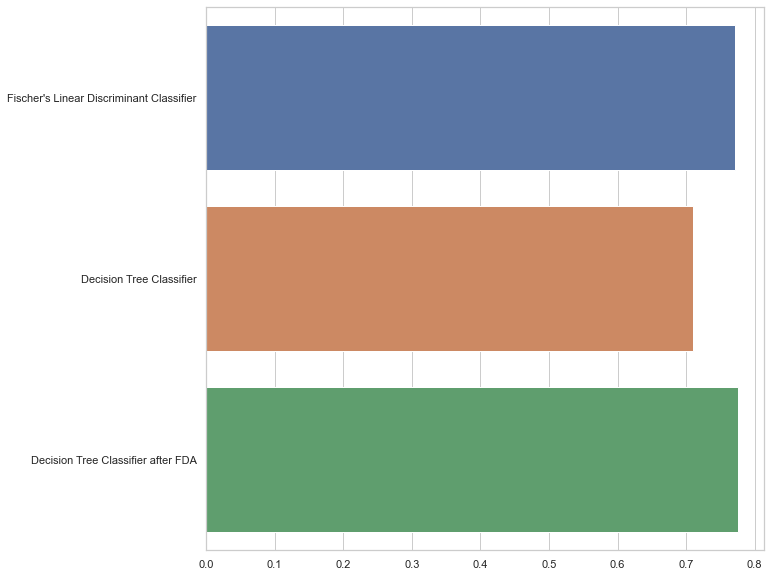

In [86]:
import seaborn as sns
 
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.barplot(y=["Fischer's Linear Discriminant Classifier", "Decision Tree Classifier", "Decision Tree Classifier after FDA"], x=accuracies, orient = "h")